# Devendra Badhe
# Project - House Pricing
https://www.kaggle.com/c/house-prices-advanced-regression-techniques


In [1]:
import pandas as pd
df_test = pd.read_csv('test.csv')
df_train= pd.read_csv('train.csv')

In [2]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Counting the number of numeric variables in the data
countInt = 0
for i in df_train.columns.values:
    if df_train[i].dtype == 'int64' or df_train[i].dtype == 'float64':
        countInt = countInt + 1

print ("There are" ,countInt, "Numeric Columns")

There are 38 Numeric Columns


In [4]:
# studying the distribution of SalesPrice
import seaborn as sns
sns.distplot(df_train['SalePrice']);

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of

In [5]:
#checing the correlation of numeric variabes with DV SalePrice
df_train.corr().SalePrice

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

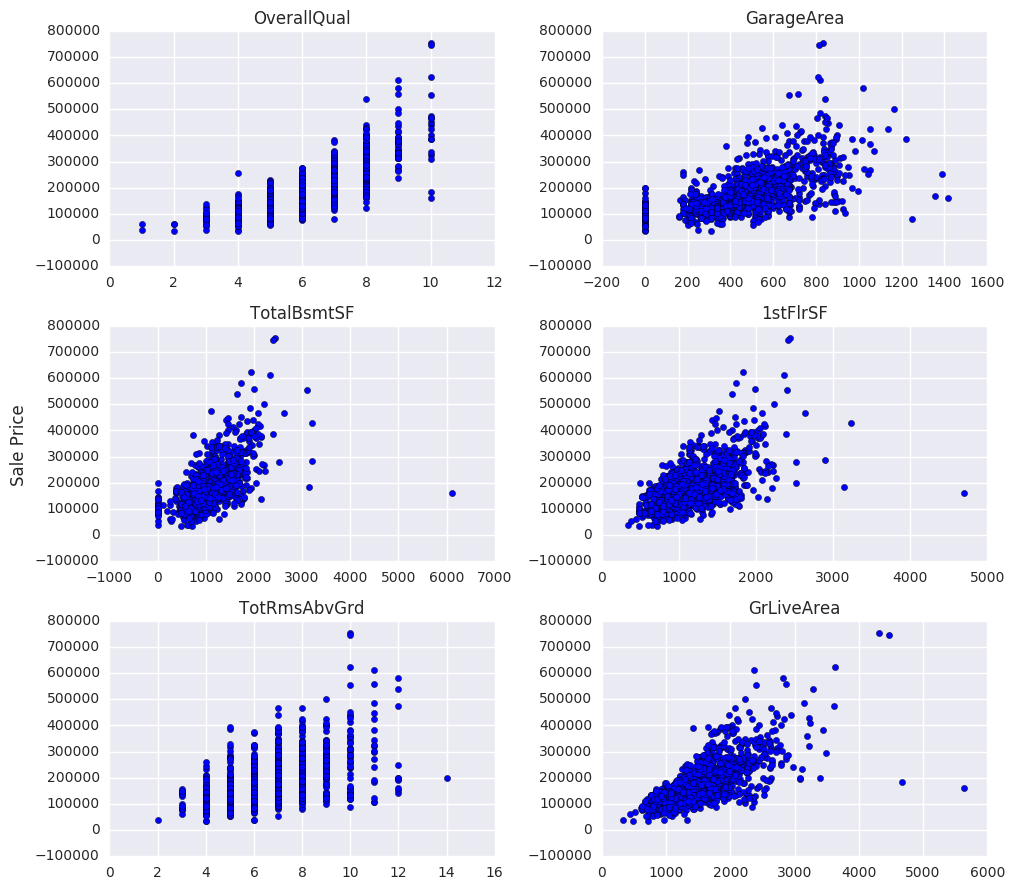

In [6]:
#Plotting the scatter plots for few highly correlated varibles.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
price = df_train.SalePrice.values
axarr[0, 0].scatter(df_train.OverallQual.values, price)
axarr[0, 0].set_title('OverallQual')
axarr[0, 1].scatter(df_train.GarageArea.values, price)
axarr[0, 1].set_title('GarageArea')
axarr[1, 0].scatter(df_train.TotalBsmtSF.values, price)
axarr[1, 0].set_title('TotalBsmtSF')
axarr[1, 1].scatter(df_train['1stFlrSF'].values, price)
axarr[1, 1].set_title('1stFlrSF')
axarr[2, 0].scatter(df_train.TotRmsAbvGrd.values, price)
axarr[2, 0].set_title('TotRmsAbvGrd')
axarr[2, 1].scatter(df_train.GrLivArea.values, price)
axarr[2, 1].set_title('GrLiveArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()


# BaseLine Model
Target price = mean price from training data

In [7]:
#calculating the mean price from train dataset.
mean_price = df_train['SalePrice'].mean()
print ("The mean price is",mean_price)

The mean price is 180921.19589041095


In [68]:
train_baseline = df_train.copy()
train_baseline['SalePrice_Pred'] = mean_price


In [11]:
#creating submission file

test_baseline = df_test.copy()
test_baseline['SalePrice_Pred'] = mean_price

submission_baseline = test_baseline.loc[:,["Id", 'SalePrice_Pred']]
submission_baseline.columns = ['Id', 'SalePrice']

# Write to csv file
submission_baseline.to_csv("C:/Users/Devendra/Google Drive/RPI folder/MSBA/Tech Fundamentals/project/Submission.csv")

submission_baseline.head()

,Id,SalePrice
0,1461,180921.19589
1,1462,180921.19589
2,1463,180921.19589
3,1464,180921.19589
4,1465,180921.19589


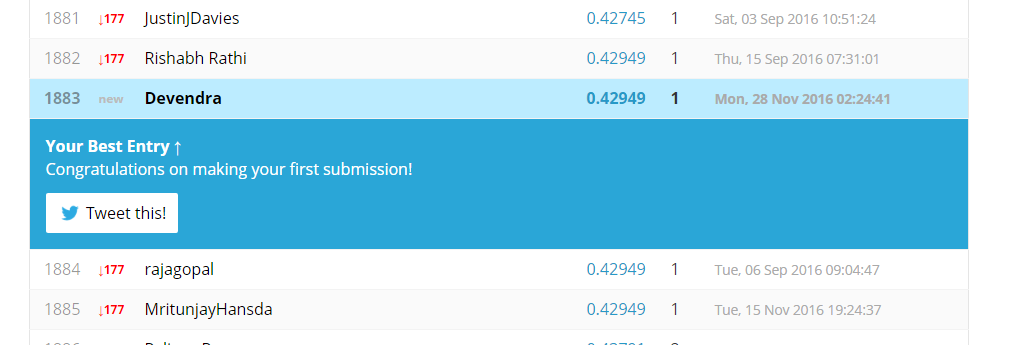

In [2]:
from IPython.display import Image

Image("C:/Users/Devendra/Google Drive/RPI folder/MSBA/Tech Fundamentals/project/Score_BaseLine.png")

# Data Munging
~First we will merge the train and test data so that the range of values and accuracy would increase while performing aggregations.

In [12]:
df_train1 = df_train[df_train.columns.values[:-1]]
df_alldata = df_train1.append(df_test, ignore_index = True)


## 1. Handling missing values

In [13]:
#checking the columns with Null values
df_alldata.columns[pd.isnull(df_alldata).sum() > 0]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

### Replacing the Missing values in the above columns with appropriate data.


a. Numerical data with continious values: (Replacing NaN with column mean)

In [14]:
df_alldata.loc[df_alldata['LotFrontage'].isnull() ,'LotFrontage'] = df_alldata['LotFrontage'].mean()
df_alldata.loc[df_alldata['MasVnrArea'].isnull() ,'MasVnrArea'] = df_alldata['MasVnrArea'].mean()
df_alldata.loc[df_alldata['BsmtFinSF1'].isnull() ,'BsmtFinSF1'] = df_alldata['BsmtFinSF1'].mean()
df_alldata.loc[df_alldata['BsmtFinSF2'].isnull() ,'BsmtFinSF2'] = df_alldata['BsmtFinSF2'].mean()
df_alldata.loc[df_alldata['BsmtUnfSF'].isnull() ,'BsmtUnfSF'] = df_alldata['BsmtUnfSF'].mean()
df_alldata.loc[df_alldata['TotalBsmtSF'].isnull() ,'TotalBsmtSF'] = df_alldata['TotalBsmtSF'].mean()
df_alldata.loc[df_alldata['GarageArea'].isnull() ,'GarageArea'] = df_alldata['GarageArea'].mean()

b. Numerical data with discreet values: (Replacing NaN with median value)

In [15]:
df_alldata.loc[df_alldata['BsmtFullBath'].isnull() ,'BsmtFullBath'] = df_alldata['BsmtFullBath'].median()
df_alldata.loc[df_alldata['BsmtHalfBath'].isnull() ,'BsmtHalfBath'] = df_alldata['BsmtHalfBath'].median()
df_alldata.loc[df_alldata['GarageYrBlt'].isnull() ,'GarageYrBlt'] = df_alldata['GarageYrBlt'].median()
df_alldata.loc[df_alldata['GarageCars'].isnull() ,'GarageCars'] = df_alldata['GarageCars'].median()


c. Non Numeric data: (Replacing NaN with most occuring value in each column)

In [16]:
df_alldata.loc[df_alldata['MSZoning'].isnull() ,'MSZoning'] = "RL"
df_alldata.loc[df_alldata['Utilities'].isnull() ,'Utilities'] = "AllPub"
df_alldata.loc[df_alldata['Exterior1st'].isnull() ,'Exterior1st'] = "VinylSd"
df_alldata.loc[df_alldata['Exterior2nd'].isnull() ,'Exterior2nd'] = "VinylSd"
df_alldata.loc[df_alldata['KitchenQual'].isnull() ,'KitchenQual'] = "TA"
df_alldata.loc[df_alldata['Functional'].isnull() ,'Functional'] = "Typ"
df_alldata.loc[df_alldata['SaleType'].isnull() ,'SaleType'] = "WD"
df_alldata.loc[df_alldata['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

d. Non Numeric data: (Replacing Nan with appropriate data where most occuring value won't make sense')

In [17]:
df_alldata.loc[df_alldata.Alley.isnull(), 'Alley'] = 'NoAlley'
df_alldata.loc[df_alldata.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
df_alldata.loc[df_alldata.MasVnrType.isnull(), 'MasVnrType'] = 'None'
df_alldata.loc[df_alldata.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
df_alldata.loc[df_alldata.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
df_alldata.loc[df_alldata.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
df_alldata.loc[df_alldata.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
df_alldata.loc[df_alldata.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'
df_alldata.loc[df_alldata.GarageType.isnull(), 'GarageType'] = 'NoGarage'
df_alldata.loc[df_alldata.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
df_alldata.loc[df_alldata.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
df_alldata.loc[df_alldata.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
df_alldata.loc[df_alldata['PoolQC'].isnull(), 'PoolQC'] = 'NoPool'
df_alldata.loc[df_alldata['Fence'].isnull(), 'Fence'] = 'NoFence'
df_alldata.loc[df_alldata['MiscFeature'].isnull(), 'MiscFeature'] = 'None'

In [18]:
df_alldata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal


In [19]:
train_munged_check = df_alldata[:df_train.shape[0]]
train_munged_check['SalePrice'] = df_train['SalePrice']

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


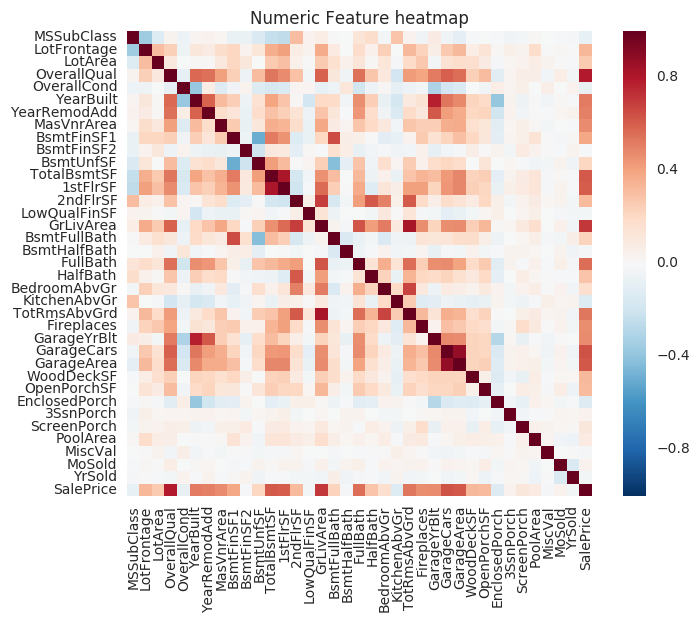

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
correlation = train_munged_check.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

In [21]:
#Dropping columns having strong correlations with other independent variables but weak with SalePrice
df_alldata.drop('GarageArea', axis=1, inplace=True)
df_alldata.drop('GarageYrBlt', axis=1, inplace=True)     
df_alldata.drop('TotRmsAbvGrd', axis=1, inplace=True)
df_alldata.drop('BsmtUnfSF', axis=1, inplace=True)
df_alldata.drop('EnclosedPorch', axis=1, inplace=True)

#Dropping columns having very weak correlation with SalePrice
df_alldata.drop('BsmtFinSF2', axis=1, inplace=True)
df_alldata.drop('LowQualFinSF', axis=1, inplace=True)
df_alldata.drop('BsmtHalfBath', axis=1, inplace=True)
df_alldata.drop('3SsnPorch', axis=1, inplace=True)
df_alldata.drop('MiscVal', axis=1, inplace=True)
df_alldata.drop('MoSold', axis=1, inplace=True)
df_alldata.drop('YrSold', axis=1, inplace=True)

# Feature engineering

In [22]:
# Adding feature 1
df_alldata.loc[df_alldata['2ndFlrSF']>0, 'Has_2Flr']=1
df_alldata.loc[df_alldata['2ndFlrSF']==0, 'Has_2Flr']=0

In [23]:
# Adding feature 2
df_alldata.loc[df_alldata['BedroomAbvGr']>3, 'Aprt_Size']=1
df_alldata.loc[df_alldata['BedroomAbvGr']<=3, 'Aprt_Size']=0

In [25]:
train_munged_check = df_alldata[:df_train.shape[0]]
train_munged_check['SalePrice'] = df_train['SalePrice']

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [26]:
train_munged_check.corr().SalePrice

Id             -0.021917
MSSubClass     -0.084284
LotFrontage     0.334820
LotArea         0.263843
OverallQual     0.790982
OverallCond    -0.077856
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475210
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
BsmtFullBath    0.227122
FullBath        0.560664
HalfBath        0.284108
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
Fireplaces      0.466929
GarageCars      0.640409
WoodDeckSF      0.324413
OpenPorchSF     0.315856
ScreenPorch     0.111447
PoolArea        0.092404
Has_2Flr        0.137656
Aprt_Size       0.189501
SalePrice       1.000000
Name: SalePrice, dtype: float64

The two features added have good correlations with the saleprice. Hence keeping the features.

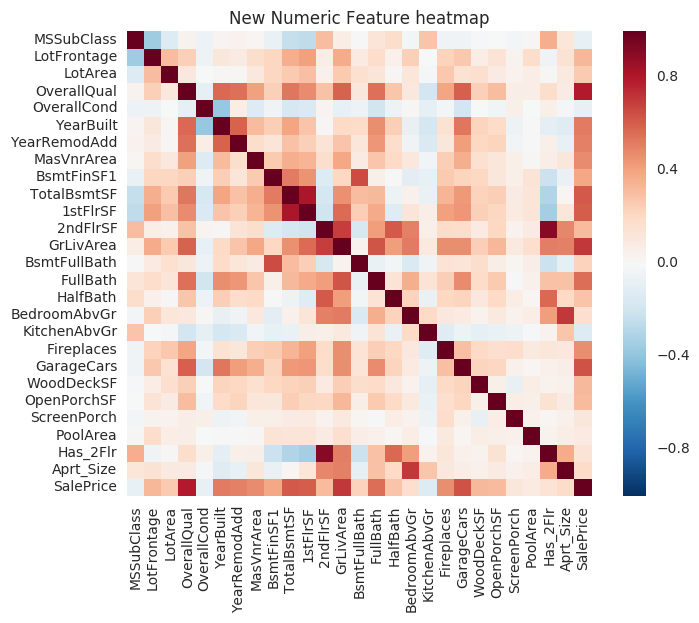

In [29]:
fig,ax = plt.subplots(figsize=(8,6))
correlation = train_munged_check.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('New Numeric Feature heatmap')

### Creating dummies for Categorical data


In [30]:
#this creates dummy columns for each categorical variable.
df_alldata = pd.get_dummies(df_alldata)

In [31]:
df_alldata.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


## Splitting the data for feeding into the models

In [32]:
train_munged = df_alldata[:df_train.shape[0]]
train_munged['SalePrice'] = df_train['SalePrice']
test_munged = df_alldata[df_train.shape[0]:]


/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [50]:
# Splitting Train for calculating accuracy of models
from sklearn.cross_validation import train_test_split

X = train_munged.iloc[:,0:-1]
y = train_munged['SalePrice']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

y_train= np.log(y_train)
y_test= np.log(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1022, 293) (438, 293) (1022,) (438,)


## Training the models and checking accuracy using Train data

In [69]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LassoCV, Ridge
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score


In [70]:
#Linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)

rmse= np.sqrt(-cross_val_score(lr,X_test, y_test, scoring="neg_mean_squared_error", cv=5))

print ('RMSLE of Linear Regression Model is ', rmse.min())
print ('R Squared of Linear Regression Model is ', r2_score(prediction, y_test)*100, '%')

RMSLE of Linear Regression Model is  0.186911798951
R Squared of Linear Regression Model is  88.6245240455 %


In [71]:
#Random forest regression
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)   
Prediction = rfr.predict(X_test)

rmse= np.sqrt(-cross_val_score(rfr,X_test, y_test, scoring="neg_mean_squared_error", cv=5))

print ('RMSLE of Random Forest Regressor Model is ', rmse.min())

print ('R Squared of Random Forest Regressor Model is ', r2_score(Prediction, y_test)*100, '%')


RMSLE of Random Forest Regressor Model is  0.145395579399
R Squared of Random Forest Regressor Model is  81.5008744123 %


In [76]:
#Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)   
Prediction = gbr.predict(X_test)
rmse= np.sqrt(-cross_val_score(gbr,X_test, y_test, scoring="neg_mean_squared_error", cv=5))

print ('RMSLE of Gradient Boosting Regressor Model is ', rmse.min())

print ('R Squared of Gradient Boosting Regressor Model is ', r2_score(Prediction, y_test)*100, '%')

RMSLE of Gradient Boosting Regressor Model is  0.117098277317
R Squared of Gradient Boosting Regressor Model is  86.8187192682 %


In [77]:
#Ridge
rg = Ridge()
rg.fit(X_train,y_train)   
Prediction = rg.predict(X_test)

rmse= np.sqrt(-cross_val_score(rg,X_test, y_test, scoring="neg_mean_squared_error", cv=5))

print ('RMSLE ridge Model is ', rmse.min())

print ('R Squared of ridge Model is ', r2_score(Prediction, y_test)*100, '%')

RMSLE ridge Model is  0.133799623147
R Squared of ridge Model is  87.5393088061 %


## Training Gradient Boosting Regressor with complete train data and predicting for Test

In [171]:
gbr.fit(train_munged.iloc[:,:-1],train_munged['SalePrice'])
Test_Pred=test_munged.copy()
Test_Pred['SalePrice'] = gbr.predict(test_munged)

# Create Submission

In [444]:
submission_GBoost = Test_Pred[['Id','SalePrice']]

# Write to csv file
submission_GBoost.to_csv("C:/Users/Devendra/Google Drive/RPI folder/MSBA/Tech Fundamentals/project/Submission.csv")



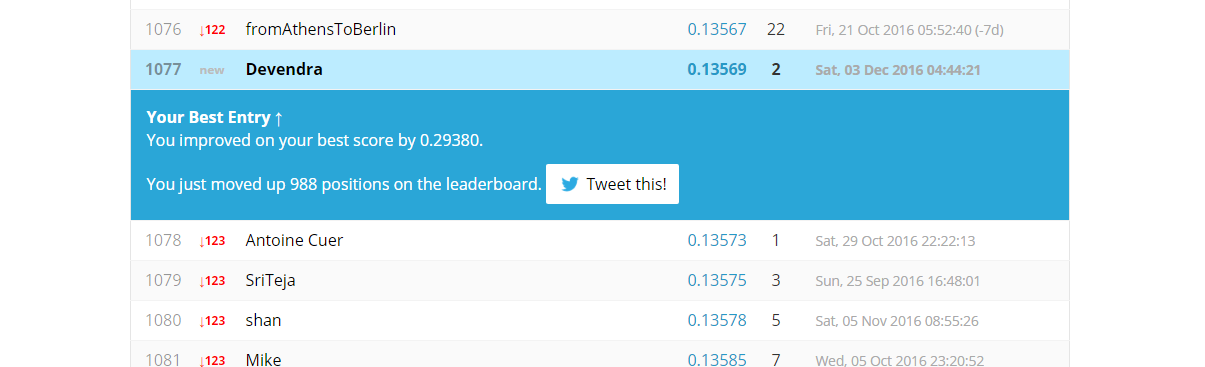

In [1]:
from IPython.display import Image

Image("C:/Users/Devendra/Google Drive/RPI folder/MSBA/Tech Fundamentals/project/Score_Gboost.png")